In [1]:
import pandas as pd
from jikanpy import Jikan
import csv as csv
import time as time
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
username = input("Enter your username: ")

Enter your username: ceflame


In [3]:
jikan = Jikan()

In [4]:
jikan.user(username= username)['anime_stats']['completed']

631

In [5]:
completed = jikan.user(username= username)['anime_stats']['completed']

In [6]:
animetitlelist = []
animescorelist = []
animeidlist = []
avgtitlelist = []
avgscorelist = []


In [7]:
for i in range (1+math.ceil(completed /300)):
    a=jikan.user(username= username, request = 'animelist',argument = 'completed', page = i +1)
    time.sleep(2)
    animescorelen = len(a['anime'])
    for j in range(animescorelen):
        animetitlelist.append(a['anime'][j]['title'])
        animescorelist.append(a['anime'][j]['score'])
        animeidlist.append(a['anime'][j]['mal_id'])

In [8]:
d = {'Anime title': animetitlelist, 'anime score': animescorelist, 'mal id': animeidlist}

In [9]:
df = pd.DataFrame(data=d)

In [10]:
animelistlen = len(animetitlelist)
for i in range(animelistlen):
    try:
    ##    avgtitlelist.append(jikan.search('anime',animeidlist[i])['results'][0]['title'])
    ##    time.sleep(2)
        avgscorelist.append(jikan.anime(animeidlist[i])['score'])
        time.sleep(2)
        print(str(len(animetitlelist) - i)+' left' )
    except Exception:
    
       
        pass
    

631 left
630 left
629 left
628 left
627 left
626 left
625 left
624 left
623 left
622 left
621 left
620 left
619 left
618 left
617 left
616 left
615 left
614 left
613 left
612 left
611 left
610 left
609 left
608 left
607 left
606 left
605 left
604 left
603 left
602 left
601 left
600 left
599 left
598 left
597 left
596 left
595 left
594 left
593 left
592 left
591 left
590 left
589 left
588 left
587 left
586 left
585 left
584 left
583 left
582 left
581 left
580 left
579 left
578 left
577 left
576 left
575 left
574 left
573 left
572 left
571 left
570 left
569 left
568 left
567 left
566 left
565 left
564 left
563 left
562 left
561 left
560 left
559 left
558 left
557 left
556 left
555 left
554 left
553 left
552 left
551 left
550 left
549 left
548 left
547 left
546 left
545 left
544 left
543 left
542 left
541 left
540 left
539 left
538 left
537 left
536 left
535 left
534 left
533 left
532 left
531 left
530 left
529 left
528 left
527 left
526 left
525 left
524 left
523 left
522 left
521 left
5

In [11]:
df['avg score'] = avgscorelist

In [12]:
pd.set_option('display.max_rows', 1000)

In [13]:
avgdf = df

In [14]:
avgdf['Score_diff'] = avgdf['avg score'] - avgdf['anime score']

In [15]:
cleanavgdf1 = avgdf[avgdf['avg score'] != 'NaN']

In [16]:
avgdf[avgdf['avg score'] != 'NaN']
len(avgdf)

631

In [17]:
cleanavgdf1.replace(["NaN", 'NaT'], np.nan, inplace = True)
missingdf = cleanavgdf1[cleanavgdf1.isnull().any(axis=1)]
cleanavgdf1 = cleanavgdf1.dropna()

In [18]:
finalcleandf = cleanavgdf1.loc[cleanavgdf1['anime score'] > 0]
  

In [19]:
finalcleandf.to_csv(username + 'data', sep='\t')

In [20]:
userdistlist = finalcleandf['anime score'].to_numpy()

In [21]:
test = finalcleandf.sort_values('anime score', ascending = False).reset_index(drop=True)

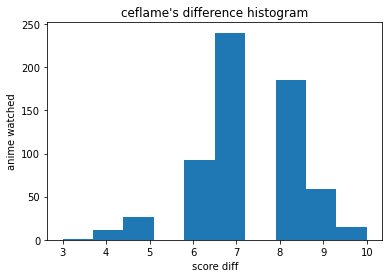

In [22]:
uniquescore = np.unique(userdistlist)
uniquescore = uniquescore.sort()
scoredis = finalcleandf['anime score'].to_numpy()
dist= plt.hist(scoredis, density=False, bins=10) 
plt.ylabel('anime watched')
plt.xlabel('score diff');
plt.title(username +'\'s difference histogram')
plt.show()

In [23]:
finalcleandf.nsmallest(10,'anime score' , keep='first')

,Anime title,anime score,mal id,avg score,Score_diff
549,Taboo Tattoo,3,29758,5.79,2.79
11,Ai Yori Aoshi: Enishi,4,394,7.15,3.15
19,Amaama to Inazuma,4,32828,7.53,3.53
60,Berserk,4,32379,6.37,2.37
87,C³: Rikan Gakkou Confusion!,4,12505,6.75,2.75
203,Hanebado!,4,37259,6.92,2.92
369,Mayoiga,4,32438,5.52,1.52
461,Qualidea Code,4,32360,6.51,2.51
502,Shakugan no Shana,4,355,7.51,3.51
513,Shinmai Maou no Testament,4,23233,6.79,2.79


In [24]:
finalcleandf.nlargest(10,'Score_diff' , keep='first')

,Anime title,anime score,mal id,avg score,Score_diff
19,Amaama to Inazuma,4,32828,7.53,3.53
502,Shakugan no Shana,4,355,7.51,3.51
11,Ai Yori Aoshi: Enishi,4,394,7.15,3.15
187,Haibane Renmei,5,387,7.99,2.99
515,Shinmai Maou no Testament: Toujou Basara no Ha...,4,29027,6.97,2.97
203,Hanebado!,4,37259,6.92,2.92
514,Shinmai Maou no Testament Burst,4,30363,6.90,2.90
596,Vampire Hunter D (2000),5,543,7.89,2.89
513,Shinmai Maou no Testament,4,23233,6.79,2.79
549,Taboo Tattoo,3,29758,5.79,2.79


In [25]:
residuals = finalcleandf['Score_diff'].to_numpy()

Text(0.5, 1.0, "ceflame's difference histogram")

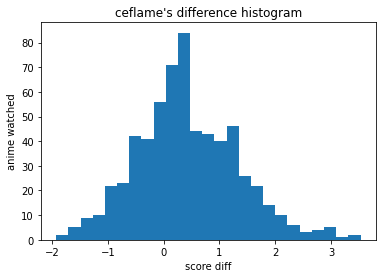

In [26]:
plt.hist(residuals, density=False, bins=25) 
plt.ylabel('anime watched')
plt.xlabel('score diff');
plt.title(username +'\'s difference histogram')

In [27]:
sum(residuals)/len(residuals)

0.42245641838351805

In [28]:
np.std(residuals)

0.9064637518191957